In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.insert(0,'..')
import pickle

import visualize
import datasets
import ldle
# Uncomment to reload a library
from importlib import reload 
visualize = reload(visualize)
ldle = reload(ldle)
datasets = reload(datasets)

matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline
matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline


In [3]:
save_dir_root = '../data/ldle1/double_barbell/'

In [4]:
X, labelsMat, ddX = datasets.Datasets().barbell()

X.shape =  (10227, 2)


# LDLE

In [5]:
ldle_obj = ldle.LDLE(X=X, eta_min=10, ddX=ddX, max_iter0=15, tau=90, N=200,
                     vis = visualize.Visualize(save_dir_root),
                     vis_y_options = {'cmap0':'summer', # for the interior
                                      'cmap1':'jet', # for the tear
                                      'labels':labelsMat[:,0]})

Doubling manifold
No. of points on the boundary = 764
Doubled manifold
Using LDLE_1
A_k, Atilde_k: 0 points processed...
A_k, Atilde_k: 4922 points processed...
A_k, Atilde_k: 9844 points processed...
A_k, Atilde_k: 14766 points processed...
A_k, Atilde_k: 19688 points processed...
Atilde_k, Atilde_k: all points processed...

Constructing low distortion local views using LDLE...
local_param: 0 points processed...
local_param: 4922 points processed...
local_param: 9844 points processed...
local_param: 14766 points processed...
local_param: 19688 points processed...
local_param: all 19690 points processed...
After iter 1, max distortion is 5.289218
After iter 2, max distortion is 5.289218
After iter 3, max distortion is 5.289218
After iter 4, max distortion is 5.289218
After iter 5, max distortion is 5.289218
After iter 6, max distortion is 5.289218
After iter 7, max distortion is 5.289218
Max local distortion = 5.289218204417803
###############
Took 305.0 seconds to perform step 1: cons

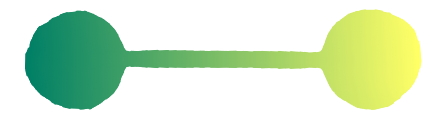

###############
Took 7.1 seconds to compute initial global embedding.
###############

Refining parameters and computing final global embedding...
Using GPA...
Iteration: 0
error: 0.00028823482581412943


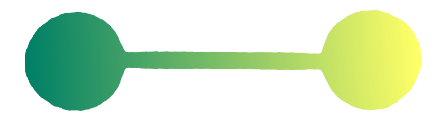

Iteration: 1
error: 0.0002830580693919078
Iteration: 2
error: 0.0002815043846930389
Iteration: 3
error: 0.0002811338370216146
Iteration: 4
error: 0.0002810662271213612
Iteration: 5
error: 0.00028110290336028044


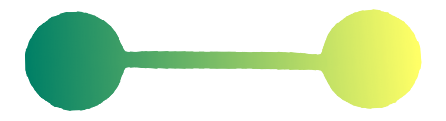

Iteration: 6
error: 0.00028115779359021755
Iteration: 7
error: 0.0002812187488066382
Iteration: 8
error: 0.0002812820348779784
Iteration: 9
error: 0.0002813411997209419
Iteration: 10
error: 0.00028139582533089487


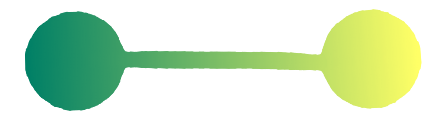

Iteration: 11
error: 0.0002814277722934161
Iteration: 12
error: 0.000281457046207117
Iteration: 13
error: 0.00028148676901906247
Iteration: 14
error: 0.0002815013894131433


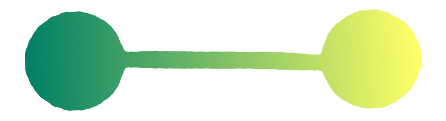

###############
Took 234.3 seconds to refine global embedding.
###############
###############
Took 243.2 seconds to perform step 3: compute global embedding.
###############


In [6]:
ldle_obj.fit()

# Optionally save for further visualizations using Visualization.ipynb

In [7]:
save_path = save_dir_root+'/ldle_obj.dat'
with open(save_path, "wb") as f:
    pickle.dump([X, labelsMat, ldle_obj], f)

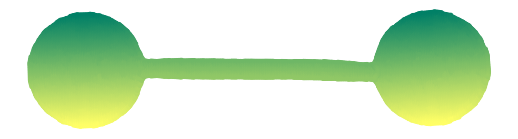

In [8]:
vis = visualize.Visualize(save_dir_root)
vis.global_embedding(ldle_obj.y_final, labelsMat[:,1], 'summer',
                     ldle_obj.color_of_pts_on_tear_final, 'jet', 'LDLE_jet',
                     figsize=(7,7), s=80)

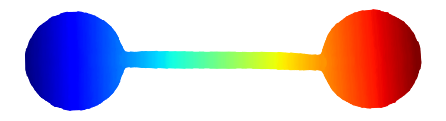

In [9]:
%matplotlib inline
ldle_obj.vis.global_embedding(ldle_obj.y_final, labelsMat[:,0], 'jet', title='LDLE0')

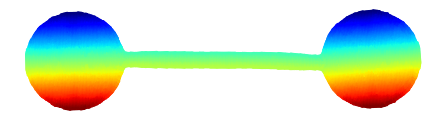

In [10]:
%matplotlib inline
ldle_obj.vis.global_embedding(ldle_obj.y_final, labelsMat[:,1], 'jet', title='LDLE1')